[*********************100%***********************]  3 of 3 completed


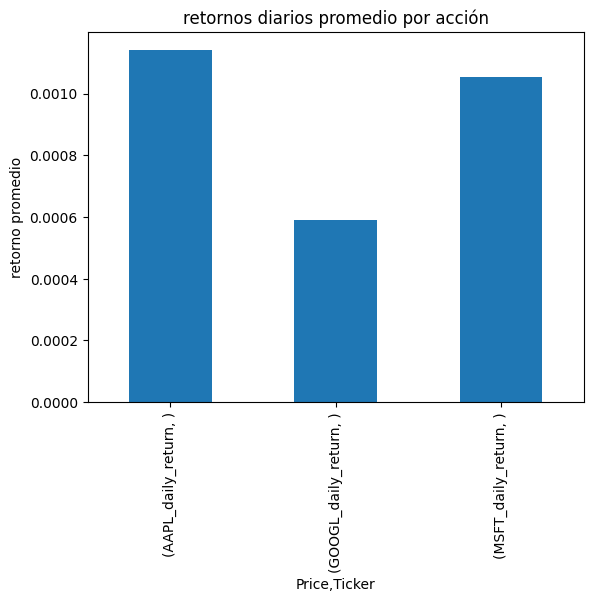

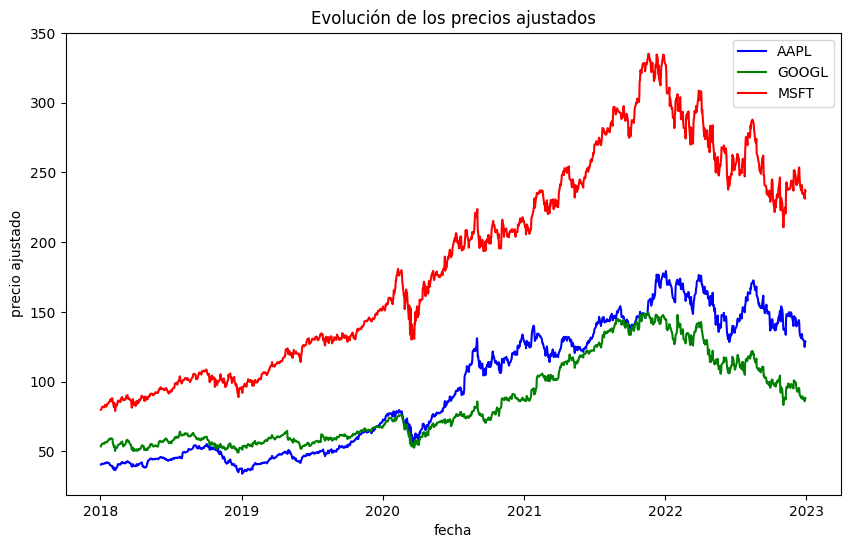

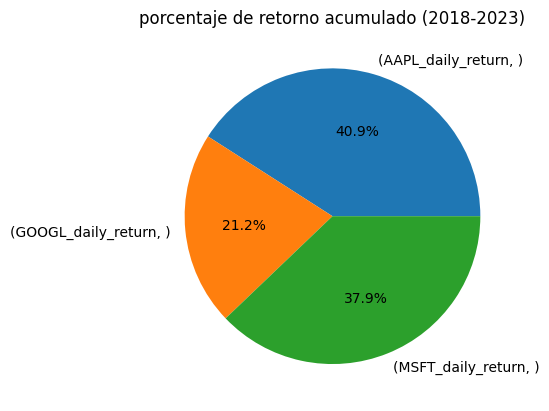

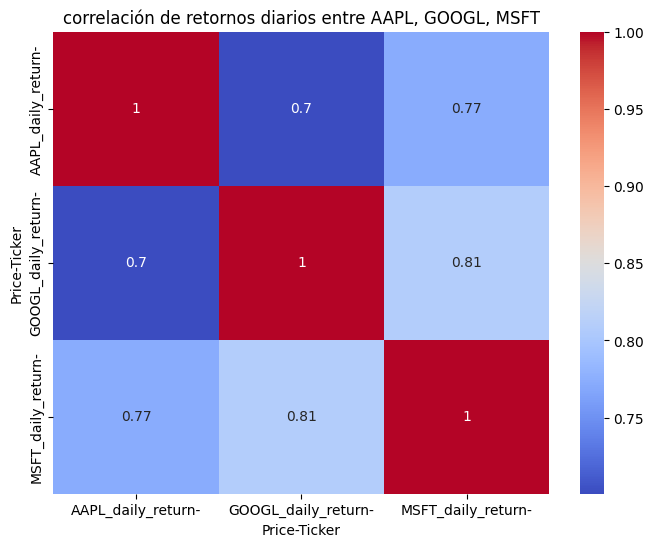

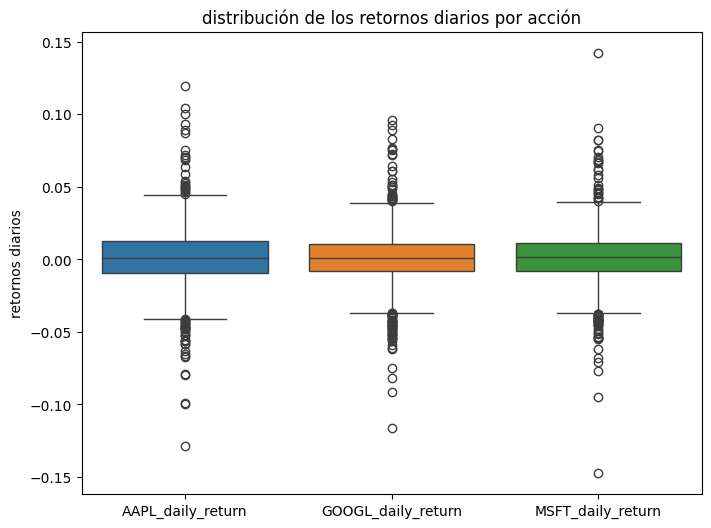

In [3]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns


tick = ['AAPL', 'GOOGL', 'MSFT']
data = yf.download(tick, start="2018-01-01", end="2023-01-01")


limpiar = data.dropna()

#retornos diarios
limpiar['AAPL_daily_return'] = limpiar['Adj Close']['AAPL'].pct_change()
limpiar['GOOGL_daily_return'] = limpiar['Adj Close']['GOOGL'].pct_change()
limpiar['MSFT_daily_return'] = limpiar['Adj Close']['MSFT'].pct_change()

# promedio móvil de 50
limpiar['AAPL_moving_avg_50'] = limpiar['Adj Close']['AAPL'].rolling(window=50).mean()
limpiar['GOOGL_moving_avg_50'] = limpiar['Adj Close']['GOOGL'].rolling(window=50).mean()
limpiar['MSFT_moving_avg_50'] = limpiar['Adj Close']['MSFT'].rolling(window=50).mean()



retorno_promedio = limpiar[['AAPL_daily_return', 'GOOGL_daily_return', 'MSFT_daily_return']].mean()
retorno_promedio.plot(kind='bar', title='retornos diarios promedio por acción', ylabel='retorno promedio')

plt.figure(figsize=(10,6))
plt.title('Evolución de los precios ajustados')
plt.plot(limpiar['Adj Close']['AAPL'], label='AAPL', color='blue')
plt.plot(limpiar['Adj Close']['GOOGL'], label='GOOGL', color='green')
plt.plot(limpiar['Adj Close']['MSFT'], label='MSFT', color='red')
plt.legend()
plt.xlabel('fecha')
plt.ylabel('precio ajustado')
plt.show()

#retorno acumulado en 5 años
total_return = (limpiar[['AAPL_daily_return', 'GOOGL_daily_return', 'MSFT_daily_return']].sum())
total_return.plot(kind='pie', autopct='%1.1f%%', title='porcentaje de retorno acumulado (2018-2023)')

#correlación entre retornos diarios
plt.figure(figsize=(8,6))
sns.heatmap(limpiar[['AAPL_daily_return', 'GOOGL_daily_return', 'MSFT_daily_return']].corr(), annot=True, cmap='coolwarm')
plt.title('correlación de retornos diarios entre AAPL, GOOGL, MSFT')
plt.show()

#para analizar la dispersión de los retornos diarios
plt.figure(figsize=(8,6))
sns.boxplot(data=limpiar[['AAPL_daily_return', 'GOOGL_daily_return', 'MSFT_daily_return']])
plt.title('distribución de los retornos diarios por acción')
plt.ylabel('retornos diarios')
plt.show()


[*********************100%***********************]  2 of 2 completed


Ticker
^TNX    2.063847
^IRX    1.264133
dtype: float64


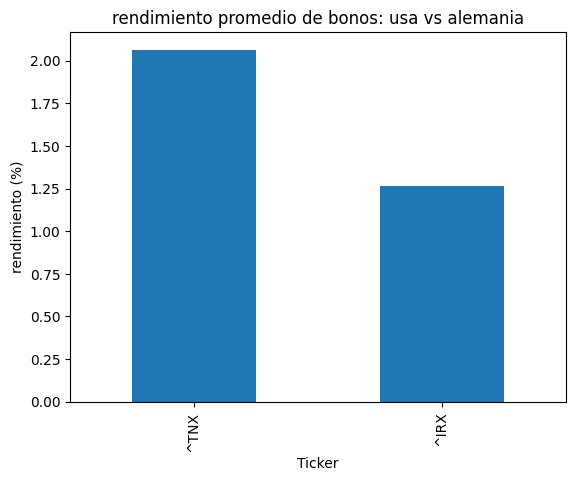

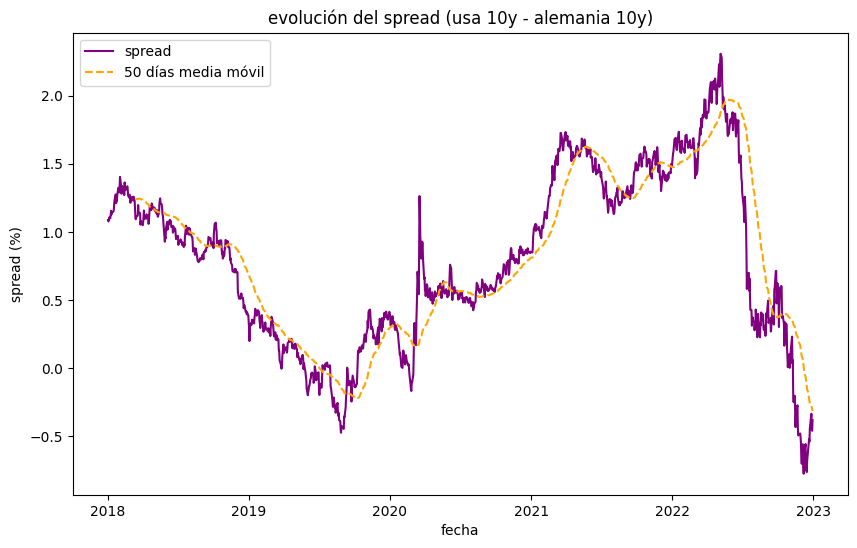

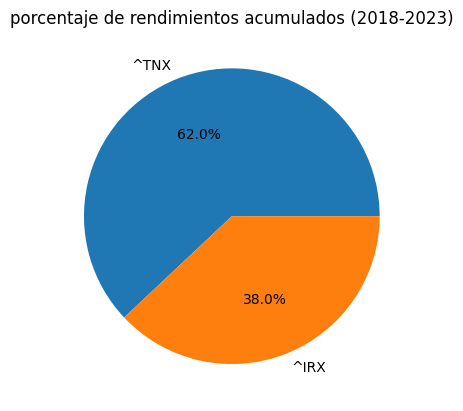

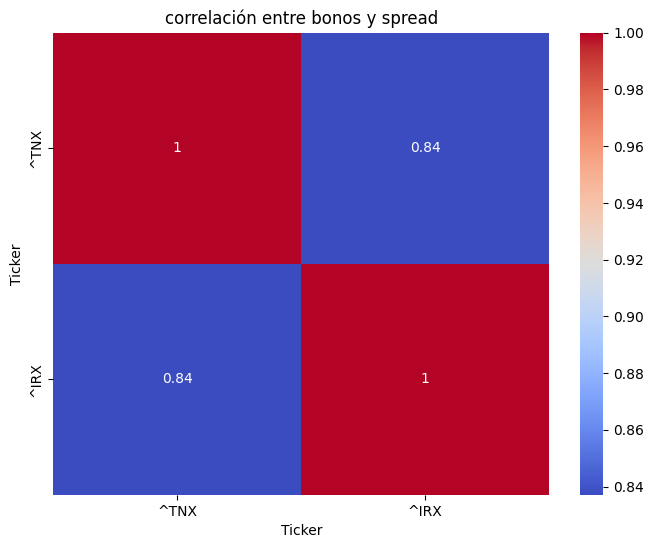

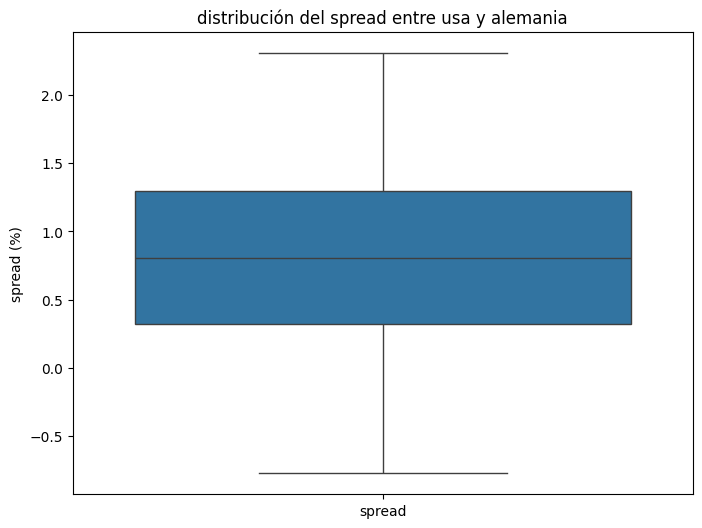

In [25]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns


bonos = ['^TNX', '^IRX']  # bono usa 10y vs bono alemania 10y
datos = yf.download(bonos, start="2018-01-01", end="2023-01-01")

# quitar los datos que no sirven
datos_limpios = datos.dropna()

# calcular  (resta entre los rendimientos)
datos_limpios['spread'] = datos_limpios['Adj Close']['^TNX'] - datos_limpios['Adj Close']['^IRX']

# promedio móvil de 50 días
datos_limpios['media_mov_50'] = datos_limpios['spread'].rolling(window=50).mean()

# gráficas con seaborn y matplotlib

# rendimiento promedio de los bonos


promedio_bonos =  datos_limpios['Adj Close'][['^TNX', '^IRX']].mean()

print(promedio_bonos)
promedio_bonos.plot(kind='bar', title='rendimiento promedio de bonos: usa vs alemania', ylabel='rendimiento (%)')

# b) evolución del spread entre usa y alemania
plt.figure(figsize=(10,6))
plt.title('evolución del spread (usa 10y - alemania 10y)')
plt.plot(datos_limpios['spread'], label='spread', color='purple')
plt.plot(datos_limpios['media_mov_50'], label='50 días media móvil', color='orange', linestyle='--')
plt.legend()
plt.xlabel('fecha')
plt.ylabel('spread (%)')
plt.show()

#  porcentaje de rendimientos acumulados en usa y alemania
rendimiento_total = datos_limpios['Adj Close'][['^TNX', '^IRX']].sum()
rendimiento_total.plot(kind='pie', autopct='%1.1f%%', title='porcentaje de rendimientos acumulados (2018-2023)')

#   correlación entre los bonos y el spread
plt.figure(figsize=(8,6))
sns.heatmap(datos_limpios['Adj Close'][['^TNX','^IRX']].corr(), annot=True, cmap='coolwarm')
plt.title('correlación entre bonos y spread')
plt.show()

#  analizar la dispersión del spread
plt.figure(figsize=(8,6))
sns.boxplot(data=datos_limpios[['spread']])
plt.title('distribución del spread entre usa y alemania')
plt.ylabel('spread (%)')
plt.show()


In [24]:
import yfinance as yf
import pandas as pd

# Descargar datos
bono = '^TNX'  # Rendimiento del bono a 10 años
indice = '^GSPC'  # Índice S&P 500

# Descargar datos de Yahoo Finance
datos_bono = yf.download(bono, start="2018-01-01", end="2023-01-01")
datos_indice = yf.download(indice, start="2018-01-01", end="2023-01-01")

# Usar solo la columna 'Adj Close'
datos = pd.concat([datos_bono['Adj Close'], datos_indice['Adj Close']], axis=1)
datos.columns = ['Bono', 'Indice']

# Calcular la correlación
correlacion = datos.corr().iloc[0, 1]  # Correlación entre 'Bono' e 'Indice'
print(f'Correlación entre los rendimientos del bono y el índice S&P 500: {correlacion:.2f}')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Correlación entre los rendimientos del bono y el índice S&P 500: -0.16


**1. Ciclos Económicos y Recesiones:**

Expansión Económica: Durante periodos de expansión económica, los ingresos corporativos tienden a aumentar, lo que impulsa al alza el índice S&P 500.
Recesiones: En tiempos de recesión, las ganancias empresariales disminuyen, lo que puede llevar a una caída en el índice.

**2. Política Monetaria: **texto en negrita**

Tasas de Interés: Las políticas monetarias, como los cambios en las tasas de interés por parte de la Reserva Federal, influyen en el costo del capital para las empresas y, por lo tanto, en sus precios de acciones.
Inyecciones de Liquidez: Las políticas de estímulo, como la compra de bonos por parte del banco central, pueden hacer que los precios de las acciones suban.

**3. Eventos Geopolíticos y Económicos: **texto en negrita**

Crisis Internacionales: Los eventos internacionales, como guerras o crisis económicas en otros países, pueden influir en el mercado estadounidense.
Tensiones Comerciales: Las disputas comerciales y las tarifas pueden afectar negativamente las ganancias corporativas y, por ende, el índice.

**4. Innovaciones y Cambios Tecnológicos: **texto en negrita**

Sector Tecnológico: El S&P 500 incluye una significativa proporción de empresas tecnológicas. La innovación en este sector puede llevar a un aumento en el índice cuando las empresas tecnológicas prosperan.

**5. Sentimiento del Mercado y Expectativas: **texto en negrita**

Confianza de los Inversores: El sentimiento general del mercado y las expectativas sobre el futuro económico influyen en el comportamiento del índice.
Rendimiento de las Empresas: Los resultados financieros de las empresas que componen el índice afectan el valor general del S&P 500.

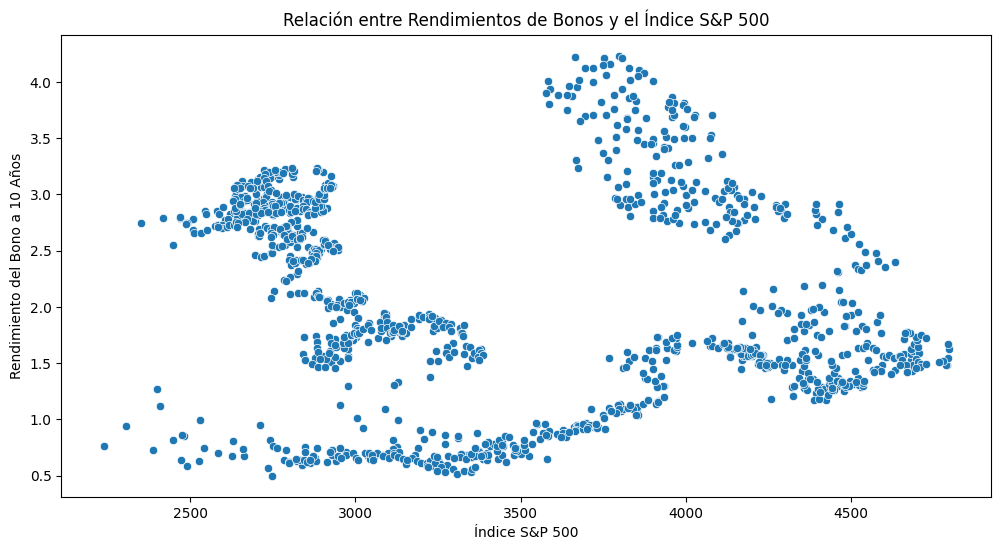

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar la correlación
plt.figure(figsize=(12, 6))
sns.scatterplot(data=datos, x='Indice', y='Bono')
plt.title('Relación entre Rendimientos de Bonos y el Índice S&P 500')
plt.xlabel('Índice S&P 500')
plt.ylabel('Rendimiento del Bono a 10 Años')
plt.show()


In [7]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from torch.utils.data import Dataset, DataLoader
import yfinance as yf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# descargar y preparar datos
bono = '^TNX'  #bono a 10 años
indice = '^GSPC'  # indice S&P 500

# Descargar datos
datos_bono = yf.download(bono, start="2018-01-01", end="2023-01-01")
datos_indice = yf.download(indice, start="2018-01-01", end="2023-01-01")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
# usar solo la columna 'Adj Close' para la predicción
datos = pd.concat([datos_bono['Adj Close'], datos_indice['Adj Close']], axis=1)
datos.columns = ['Bono', 'Indice']


In [9]:
print(datos)

             Bono       Indice
Date                          
2018-01-02  2.465  2695.810059
2018-01-03  2.447  2713.060059
2018-01-04  2.453  2723.989990
2018-01-05  2.476  2743.149902
2018-01-08  2.480  2747.709961
...           ...          ...
2022-12-23  3.751  3844.820068
2022-12-27  3.860  3829.250000
2022-12-28  3.887  3783.219971
2022-12-29  3.835  3849.280029
2022-12-30  3.879  3839.500000

[1259 rows x 2 columns]


In [10]:
# Escalar los datos
scaler = MinMaxScaler()
datos_scaled = scaler.fit_transform(datos)

In [11]:
# Convertir a serie temporal
def crear_datasets(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size, 0])  # La tasa de interés del bono
    return np.array(X), np.array(y)

window_size = 30  # Tamaño de la ventana de entrada

In [12]:
X, y = crear_datasets(datos_scaled, window_size)

In [31]:
print(f"x: shape: {X.shape}")
print(f"y: shape: {y.shape}")

x: shape: (1229, 30, 2)
y: shape: (1229,)


In [26]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Convertir a tensores de PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [28]:
print(y_train.shape)

torch.Size([983])


Epoca 1, Pérdida: 0.4566121135027178
Epoca 2, Pérdida: 0.0323743025111335
Epoca 3, Pérdida: 0.008100652901996528
Epoca 4, Pérdida: 0.00656546448026934
Epoca 5, Pérdida: 0.005443644942715764
Epoca 6, Pérdida: 0.004172990316404931
Epoca 7, Pérdida: 0.003934842316553958
Epoca 8, Pérdida: 0.003497941727419534
Epoca 9, Pérdida: 0.0035256886997470454
Epoca 10, Pérdida: 0.0036751265645087244


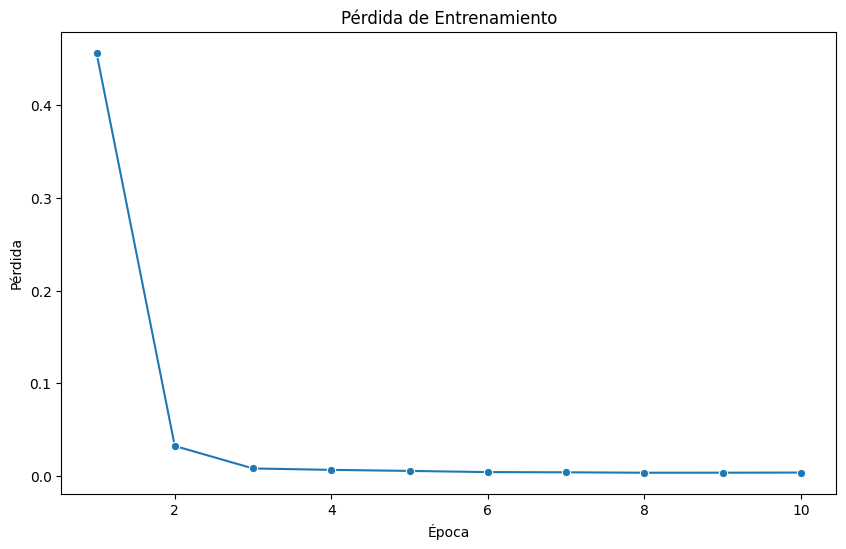

In [34]:


# 2. Definir el modelo Transformer
class TransformerModel(nn.Module):
    def __init__(self, input_dim, model_dim, num_heads, num_layers, output_dim):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, model_dim)
        self.transformer = nn.Transformer(d_model=model_dim, nhead=num_heads, num_encoder_layers=num_layers)
        self.fc = nn.Linear(model_dim, output_dim)

    def forward(self, x):
        x = self.embedding(x)
        x = x.permute(1, 0, 2)
        x = self.transformer(x, x)
        x = x.permute(1, 0, 2)
        x = self.fc(x[:, -1, :])

        return x

# Parámetros del modelo
input_dim = 2
model_dim = 64
num_heads = 4
num_layers = 2
output_dim = 1

# Instanciar el modelo
modelo = TransformerModel(input_dim, model_dim, num_heads, num_layers, output_dim)

# 3. Entrenar el modelo
criterion = nn.MSELoss()
optimizer = optim.Adam(modelo.parameters(), lr=0.001)

# Crear DataLoader
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

epoch_losses = []

# Entrenamiento
for epoch in range(10):  # Número de épocas
    modelo.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()

        output = modelo(X_batch)



        loss = criterion(output.squeeze(), y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    epoch_losses.append(epoch_loss / len(train_loader))
    print(f'Epoca {epoch+1}, Pérdida: {epoch_loss / len(train_loader)}')


plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, len(epoch_losses) + 1), y=epoch_losses, marker='o')
plt.title('Pérdida de Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.show()





In [35]:

modelo.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        output = modelo(X_batch)
        y_pred.append(output.squeeze().numpy())
        y_true.append(y_batch.numpy())

y_pred = np.concatenate(y_pred)
y_true = np.concatenate(y_true)


mse = mean_squared_error(y_true, y_pred)
print(f'MSE: {mse}')


MSE: 0.020404446870088577


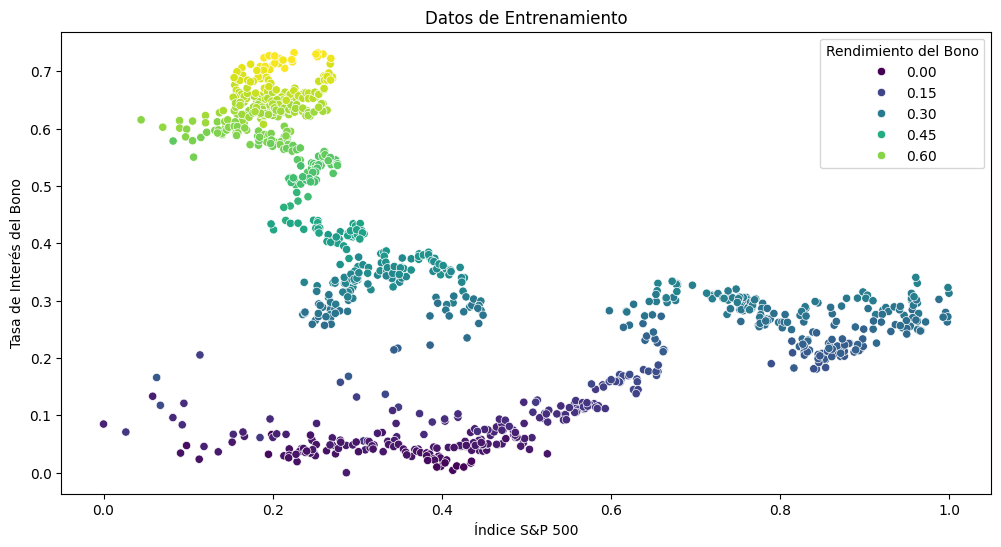

In [5]:

df_train = pd.DataFrame({
    'Fecha': np.arange(len(X_train)),
    'Bono': X_train[:, -1, 0].numpy(),
    'Índice': X_train[:, -1, 1].numpy(),
    'Tasa': y_train.numpy()
})


plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_train, x='Índice', y='Tasa', hue='Bono', palette='viridis')
plt.title('Datos de Entrenamiento')
plt.xlabel('Índice S&P 500')
plt.ylabel('Tasa de Interés del Bono')
plt.legend(title='Rendimiento del Bono')
plt.show()


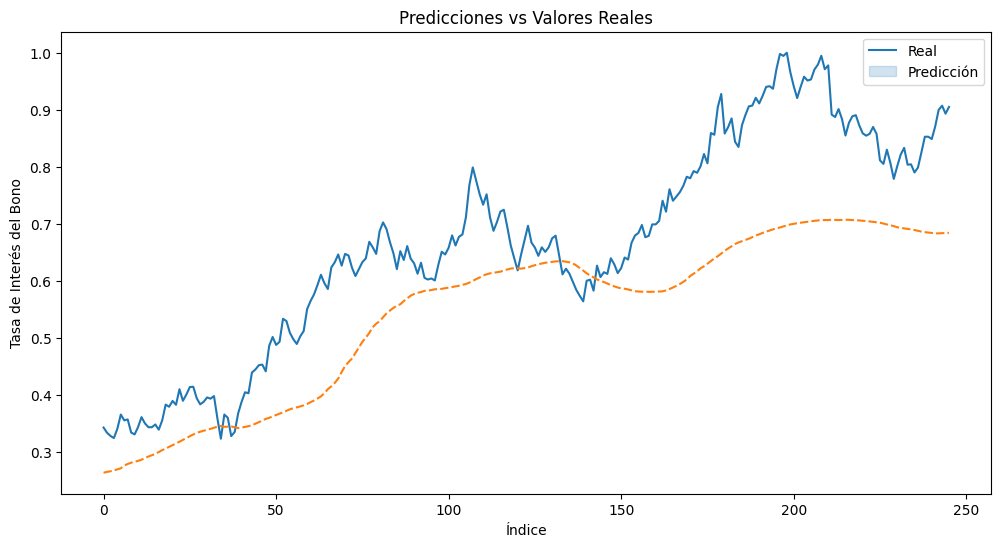

In [73]:

df_pred = pd.DataFrame({
    'Real': y_true,
    'Predicción': y_pred
})


plt.figure(figsize=(12, 6))
sns.lineplot(data=df_pred, palette='tab10')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Índice')
plt.ylabel('Tasa de Interés del Bono')
plt.legend(labels=['Real', 'Predicción'])
plt.show()


torch.Size([30, 2])


<ipython-input-74-4f8e0a9b22f6>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(datos_iniciales, dtype=torch.float32).unsqueeze(0)  # Añadir batch dimension


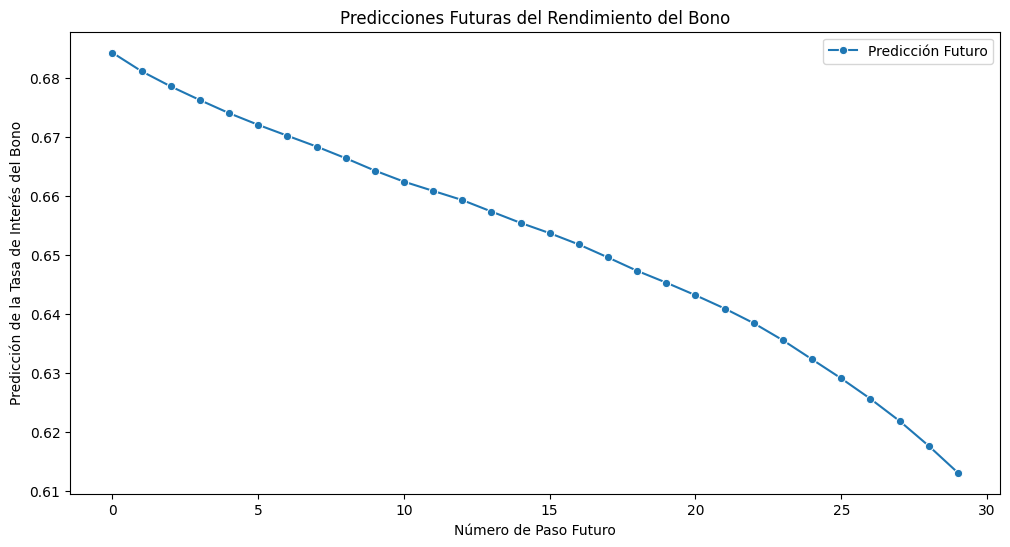

In [74]:
def predecir_variados(modelo, datos_iniciales, pasos_futuros):
    modelo.eval()
    predicciones = []
    x = torch.tensor(datos_iniciales, dtype=torch.float32).unsqueeze(0)
    with torch.no_grad():
        for _ in range(pasos_futuros):
            salida = modelo(x)
            predicciones.append(salida.item())
            x = x[:, 1:, :]
            salida_expanded = salida.unsqueeze(0).expand(x.shape[0], 1, x.shape[2])
            x = torch.cat((x, salida_expanded), dim=1)
    return predicciones



datos_iniciales = X_test[-1]
print(datos_iniciales.shape)

pasos_futuros = 30
predicciones_futuras = predecir_variados(modelo, datos_iniciales, pasos_futuros)


df_pred = pd.DataFrame({
    'Paso Futuro': range(len(predicciones_futuras)),
    'Predicción Futuro': predicciones_futuras
})

# Graficar predicciones futuras
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_pred, x='Paso Futuro', y='Predicción Futuro', marker='o', label='Predicción Futuro')
plt.title('Predicciones Futuras del Rendimiento del Bono')
plt.xlabel('Número de Paso Futuro')
plt.ylabel('Predicción de la Tasa de Interés del Bono')
plt.legend()
plt.show()



In [22]:
import yfinance as yf
import pandas as pd

# Descargar datos
bono = '^TNX'  # Rendimiento del bono a 10 años
indice = '^GSPC'  # Índice S&P 500

# Descargar datos de Yahoo Finance
datos_bono = yf.download(bono, start="2018-01-01", end="2023-01-01")
datos_indice = yf.download(indice, start="2018-01-01", end="2023-01-01")

# Usar solo la columna 'Adj Close'
datos = pd.concat([datos_bono['Adj Close'], datos_indice['Adj Close']], axis=1)
datos.columns = ['Bono', 'Indice']

# Calcular la correlación
correlacion = datos.corr().iloc[0, 1]  # Correlación entre 'Bono' e 'Indice'
print(f'Correlación entre los rendimientos del bono y el índice S&P 500: {correlacion:.2f}')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Correlación entre los rendimientos del bono y el índice S&P 500: -0.16


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Datos de entrada (por ejemplo, datos de entrenamiento previamente preparados)
# Asumamos que `X` contiene los datos del índice y `y` los rendimientos de bonos
X = np.array(...)  # Datos del índice
y = np.array(...)  # Rendimientos de bonos

# Normalización
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_normalizado = scaler_X.fit_transform(X)
y_normalizado = scaler_y.fit_transform(y.reshape(-1, 1))

# Convertir a tensores
X_tensor = torch.tensor(X_normalizado, dtype=torch.float32)
y_tensor = torch.tensor(y_normalizado, dtype=torch.float32)

# Ejemplo simple de red neuronal
class Modelo(nn.Module):
    def __init__(self):
        super(Modelo, self).__init__()
        self.fc1 = nn.Linear(2, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instanciar el modelo
modelo = Modelo()
criterio = nn.MSELoss()
optimizador = torch.optim.Adam(modelo.parameters(), lr=0.01)

# Entrenamiento del modelo
for epoch in range(100):
    modelo.train()
    optimizador.zero_grad()
    y_pred = modelo(X_tensor).squeeze()
    perdida = criterio(y_pred, y_tensor)
    perdida.backward()
    optimizador.step()
    if (epoch + 1) % 10 == 0:
        print(f'Epoca {epoch+1}, Pérdida: {perdida.item()}')

# Predicciones
modelo.eval()
y_pred = modelo(X_tensor).detach().numpy()
y_pred_original = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

# Ejemplo de visualización de predicciones
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y, label='Rendimientos Reales')
plt.plot(y_pred_original, label='Predicciones del Modelo')
plt.title('Predicciones de Rendimientos de Bonos')
plt.xlabel('Índice de Tiempo')
plt.ylabel('Rendimiento del Bono')
plt.legend()
plt.show()


In [64]:
import torch

# Tensor de forma (4, 5, 6)
tensor1 = torch.randn(2, 2, 3)
print(tensor1)
# Tensor de forma (4, 4, 6) (tamaños incompatibles para la dimensión 1)
tensor2 = torch.randn(2, 1, 3)
print(tensor2)

result = torch.cat((tensor1, tensor2), dim=1)
print(result)


tensor([[[ 0.4101, -0.0372,  0.1691],
         [-0.6518, -0.6269, -0.2680]],

        [[-0.1146, -2.3230, -0.8241],
         [-1.2192,  1.5765,  0.3214]]])
tensor([[[-1.6191, -0.7191,  0.0344]],

        [[ 0.8053, -1.5825, -1.4401]]])
tensor([[[ 0.4101, -0.0372,  0.1691],
         [-0.6518, -0.6269, -0.2680],
         [-1.6191, -0.7191,  0.0344]],

        [[-0.1146, -2.3230, -0.8241],
         [-1.2192,  1.5765,  0.3214],
         [ 0.8053, -1.5825, -1.4401]]])
